<a href="https://colab.research.google.com/github/FajarTampan37/ML/blob/main/TestCopyModel_LSTM_Saham_Kimia_farma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [288]:
import math
import io
import numpy as np
import pandas as pd
import tensorflow as tf
import yfinance as yf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [289]:
# download the data
df = yf.download(tickers=['KAEF.JK'], start='2022-01-06', end='2024-10-21')
y = df['Close'].fillna(method='ffill')
y = y.values.reshape(-1, 1)

/tmp/ipython-input-289-3432042684.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers=['KAEF.JK'], start='2022-01-06', end='2024-10-21')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-289-3432042684.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = df['Close'].fillna(method='ffill')


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 671 entries, 2022-01-06 to 2024-10-18
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, KAEF.JK)   671 non-null    float64
 1   (High, KAEF.JK)    671 non-null    float64
 2   (Low, KAEF.JK)     671 non-null    float64
 3   (Open, KAEF.JK)    671 non-null    float64
 4   (Volume, KAEF.JK)  671 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 31.5 KB


In [291]:
df.isnull().sum()/len(df)

,,0
Price,Ticker,
Close,KAEF.JK,0.0
High,KAEF.JK,0.0
Low,KAEF.JK,0.0
Open,KAEF.JK,0.0
Volume,KAEF.JK,0.0


In [292]:
df

Price,Close,High,Low,Open,Volume
Ticker,KAEF.JK,KAEF.JK,KAEF.JK,KAEF.JK,KAEF.JK
Date,,,,,
2022-01-06,2452.824219,2531.947581,2423.152958,2433.043378,4883300
2022-01-07,2413.262695,2472.605221,2403.372274,2452.824379,2872200
2022-01-10,2561.618896,2591.290158,2413.262590,2423.153010,10207500
2022-01-11,2393.481689,2601.180514,2383.591269,2561.618833,10175400
2022-01-12,2324.248779,2423.152983,2304.467939,2393.481722,4179200
...,...,...,...,...,...
2024-10-14,715.000000,730.000000,710.000000,725.000000,1596500
2024-10-15,725.000000,730.000000,710.000000,720.000000,776400


In [293]:
print(df.columns)

MultiIndex([( 'Close', 'KAEF.JK'),
            (  'High', 'KAEF.JK'),
            (   'Low', 'KAEF.JK'),
            (  'Open', 'KAEF.JK'),
            ('Volume', 'KAEF.JK')],
           names=['Price', 'Ticker'])


In [294]:
df = df.drop(['Open','High','Low','Volume'], axis=1)
print(df.dtypes)

Price  Ticker 
Close  KAEF.JK    float64
dtype: object


In [295]:
df

Price,Close
Ticker,KAEF.JK
Date,
2022-01-06,2452.824219
2022-01-07,2413.262695
2022-01-10,2561.618896
2022-01-11,2393.481689
2022-01-12,2324.248779
...,...
2024-10-14,715.000000
2024-10-15,725.000000


In [296]:
#Membuat data frame baru dari adj close
data = df[['Close']].copy()  # Create a new DataFrame with 'Close'


In [297]:
# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
y = scaler.transform(y)

In [298]:
#print(y)

In [299]:
#Menghitung jumlah baris untuk data training
training_data_size=math.ceil(len(y)*.8)
training_data_size

537

In [300]:
#data yang telah di skala, di uji train
train_data = y[0:training_data_size, :]
#memisahkan Xtrain dan Ytrain
x_train = []
y_train = []

for i in range(50, len(train_data)):
  x_train.append(train_data[i-50:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 51:
    print(x_train)
    print(y_train)

[array([0.94564666, 0.92588189, 1.        , 0.91599939, 0.88141093,
       0.88141093, 0.86658736, 0.86658736, 0.78752794, 0.74799829,
       0.74305704, 0.79246913, 0.80235164, 0.76776306, 0.77764556,
       0.80235164, 0.79246913, 0.80729283, 0.80235164, 0.81717521,
       0.81223402, 0.83694009, 0.8221164 , 0.81717521, 0.80729283,
       0.81223402, 0.79246913, 0.77764556, 0.78752794, 0.78258675,
       0.78258675, 0.78258675, 0.79246913, 0.79246913, 0.75788068,
       0.75788068, 0.76282187, 0.74305704, 0.71835097, 0.66399768,
       0.61458559, 0.58246773, 0.59976196, 0.61705619, 0.62693857,
       0.60223256, 0.58493833, 0.58987952, 0.57505588, 0.57752648])]
[np.float64(0.579997075121444)]
[array([0.94564666, 0.92588189, 1.        , 0.91599939, 0.88141093,
       0.88141093, 0.86658736, 0.86658736, 0.78752794, 0.74799829,
       0.74305704, 0.79246913, 0.80235164, 0.76776306, 0.77764556,
       0.80235164, 0.79246913, 0.80729283, 0.80235164, 0.81717521,
       0.81223402, 0.83694

In [301]:
#Ydatatrain = pd.DataFrame(y_train)
#Ydatatrain.to_excel('Ydatatrain.xlsx', index=True)

In [302]:
# generate the input and output sequences
n_lookback = 60  # length of input sequences (lookback period)
n_forecast = 30  # length of output sequences (forecast period)

In [303]:
# Convert x_train and y_train to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)
# Reshape x_train to 3D for LSTM input
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

In [304]:
#print(y_train)

In [305]:
# Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))  # Dense layer untuk prediksi beberapa nilai sekaligus


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [306]:
#kompilasi Model dengan fungsi MSE
model.compile(optimizer='adam', loss='mean_squared_error')

In [307]:
model.summary()


Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_47 (LSTM)                  │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_48 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [339]:
results = {}
for epoch_count in range(10, 101, 10):
    print(f"\n🔄 Training dengan epoch = {epoch_count}")

    model = Sequential()
    model.add(LSTM(units=50, return_sequences=False, input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_absolute_percentage_error')

    history = model.fit(
        x_train, y_train,
        batch_size=4,
        epochs=epoch_count,
        verbose=1
    )

    final_loss = history.history['loss'][-1]
    results[epoch_count] = final_loss


🔄 Training dengan epoch = 10
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


122/122 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 34.8781
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 9.4782
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 7.8890
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 7.6380
Epoch 5/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 7.9488
Epoch 6/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 7.8919
Epoch 7/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 6.8778
Epoch 8/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 6.4715
Epoch 9/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 5.9406
Epoch 10/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 6.7172

🔄 Training dengan epoch = 20
Epoch 1/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 23.5391
Epoch 2/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 9.4607
Epoch 3/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 7.4137
Epoch 4/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.2499
Epoch 5/20
122/122 ━━━━━━━

In [309]:
#Data_test
test_data = y[training_data_size-50:, :]
#Membuat Xtest dengan Ytest
x_test = []
# Replace 'dataset' with 'y'
y_test = y[training_data_size:, :]
for i in range(50, len(test_data)):
  x_test.append(test_data[i-50:i, 0])

In [310]:
# Periksa apakah data test tidak mengandung NaN sebelum prediksi
print("Jumlah NaN dalam x_test:", np.isnan(x_test).sum())

Jumlah NaN dalam x_test: 0


In [311]:
#konversi menjadi numpy array
x_test = np.array(x_test)
y_test = np.array(y_test)

In [312]:
#Mengubah data train menjadi bentuk yang diterima LSTM
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(134, 50, 1)

In [313]:
# prompt: buat kode untuk memprediksi model dengan variabel x_test

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


In [314]:
predictions

array([[813.9683 ],
       [834.663  ],
       [853.9073 ],
       [868.4204 ],
       [880.355  ],
       [887.03284],
       [882.6154 ],
       [877.3661 ],
       [877.3287 ],
       [869.86383],
       [854.6144 ],
       [838.01764],
       [814.3933 ],
       [794.67163],
       [780.038  ],
       [767.87573],
       [757.10895],
       [747.3225 ],
       [741.12787],
       [738.38916],
       [732.85516],
       [729.6988 ],
       [730.4714 ],
       [729.94855],
       [726.0866 ],
       [721.5484 ],
       [718.7723 ],
       [715.84247],
       [712.68353],
       [712.194  ],
       [716.7133 ],
       [735.8541 ],
       [749.7281 ],
       [754.03644],
       [758.3345 ],
       [759.6624 ],
       [757.55225],
       [752.3558 ],
       [744.5408 ],
       [737.55676],
       [726.12823],
       [705.93005],
       [683.02576],
       [658.4751 ],
       [643.07745],
       [628.4933 ],
       [616.98206],
       [606.8544 ],
       [595.5391 ],
       [586.1289 ],


In [315]:
# prompt: menghitung akurasi dengan RMSE

# Evaluate the model using RMSE
rmse = np.sqrt(np.mean(((predictions - scaler.inverse_transform(y_test)) ** 2)))
print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 41.861760450980704


In [316]:
# Calculate MAPE
actual_values = scaler.inverse_transform(y_test)
mape = np.mean(np.abs((actual_values - predictions) / actual_values)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Percentage Error (MAPE): 4.22%


In [317]:
# Data untuk grafik
train = data[:training_data_size]
valid = data[training_data_size:]
valid['Predictions'] = predictions

/tmp/ipython-input-317-3782609707.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


In [318]:
# Visualisasi data
#plt.figure(figsize=(16,8))
#plt.title('Model LSTM')
#plt.xlabel('Date')
#plt.ylabel('Harga Adjust Close')
#plt.plot(train['Adj Close'])
#plt.plot(valid[['Adj Close', 'Predictions']])
#plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
#plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━

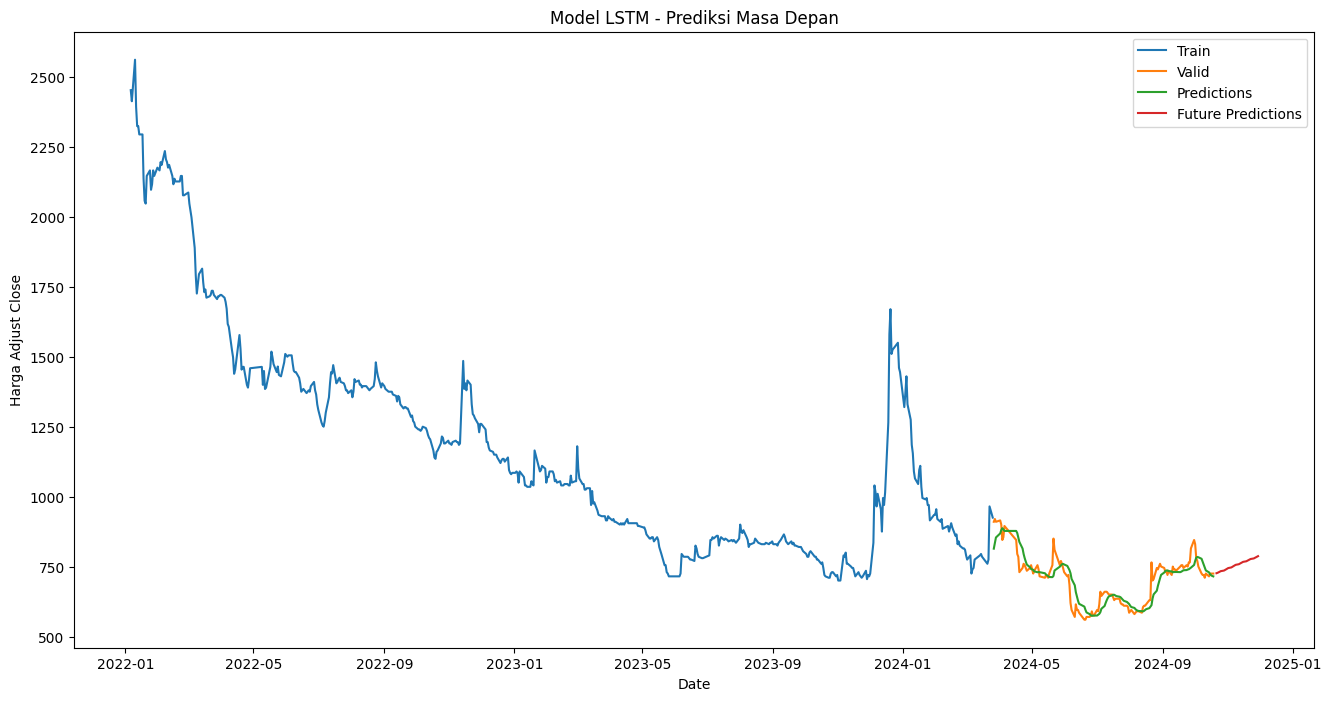


🏆 Hasil semua epoch:
Epoch 10: MAPE = 6.4355
Epoch 20: MAPE = 5.1004
Epoch 30: MAPE = 4.8144
Epoch 40: MAPE = 4.7881
Epoch 50: MAPE = 4.6381
Epoch 60: MAPE = 4.7507
Epoch 70: MAPE = 4.7140
Epoch 80: MAPE = 4.6338
Epoch 90: MAPE = 4.6266
Epoch 100: MAPE = 4.7016

✅ Epoch terbaik: 90 dengan MAPE terendah = 4.6266


In [340]:
# Prediksi 30 hari ke depan
future_predictions = []
last_60_days = test_data[-60:]  # Ambil data 60 hari terakhir dari test_data
current_input = last_60_days.reshape(1, 60, 1)

for _ in range(30):  # Iterasi selama 30 hari
    # Prediksi nilai berikutnya
     next_prediction = model.predict(current_input)
     # Simpan hasil prediksi (dalam bentuk asli, sebelum scaling)
     future_predictions.append(next_prediction[0, 0])
    # Tambahkan prediksi ke input
     current_input = np.append(current_input[:, 1:, :], [[[next_prediction[0, 0]]]], axis=1)

# Transformasi kembali prediksi ke nilai asli
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Tanggal untuk prediksi 30 hari ke depan
last_date = data.index[-1]
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=30, freq='B')

# Buat DataFrame untuk hasil prediksi
future_df = pd.DataFrame({'Date': future_dates, 'Predictions': future_predictions.flatten()})
future_df.set_index('Date', inplace=True)

# Gabungkan hasil prediksi dengan data validasi
plt.figure(figsize=(16, 8))
plt.title('Model LSTM - Prediksi Masa Depan')
plt.xlabel('Date')
plt.ylabel('Harga Adjust Close')
plt.plot(train['Close'], label='Train')
plt.plot(valid['Close'], label='Valid')
plt.plot(valid['Predictions'], label='Predictions')
plt.plot(future_df['Predictions'], label='Future Predictions')
plt.legend(loc='upper right')

plt.show()

print("\n🏆 Hasil semua epoch:")
for ep, loss in results.items():
    print(f"Epoch {ep}: MAPE = {loss:.4f}")

optimal_epoch = min(results, key=results.get)
print(f"\n✅ Epoch terbaik: {optimal_epoch} dengan MAPE terendah = {results[optimal_epoch]:.4f}")

KeyError: 'Adj Close'

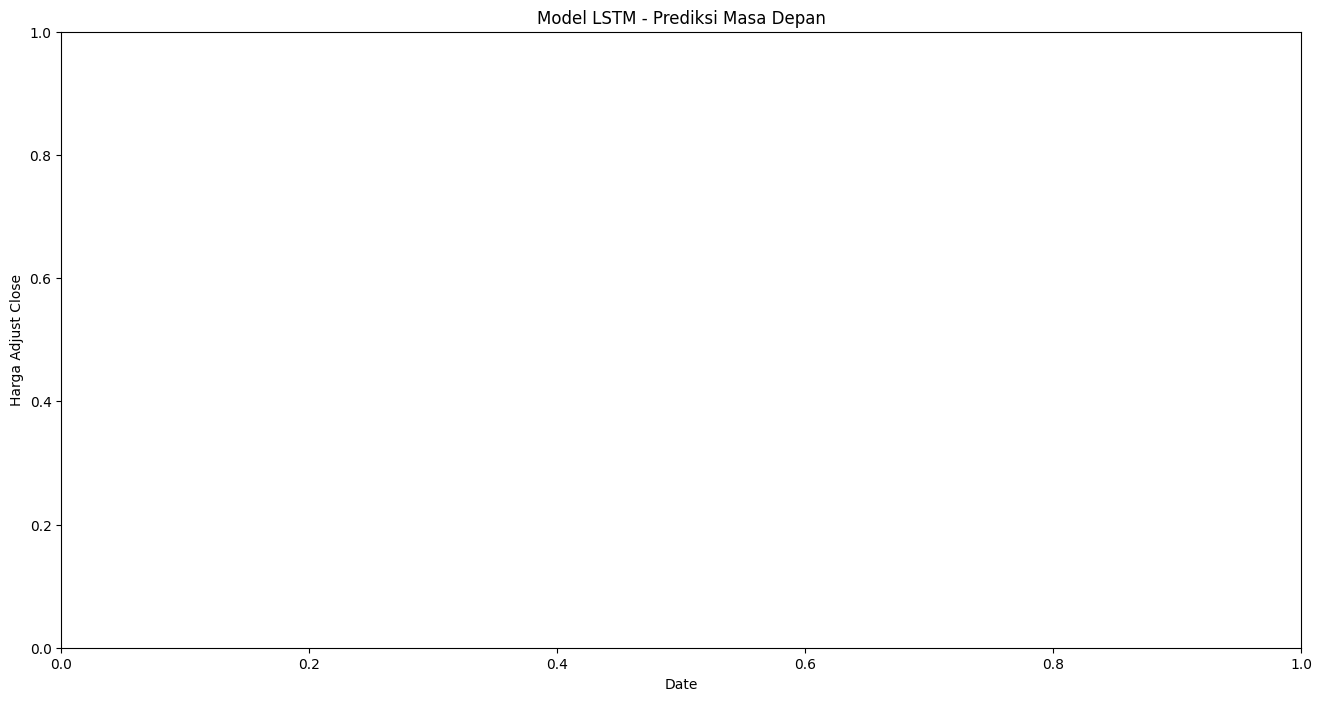

In [328]:
# prompt: saya ingin mendapatkan nilai prediksi 30 hari tersebut, data dengan plot bewarna merah

import matplotlib.pyplot as plt

# ... (your existing code) ...

# Plot the 30-day predictions in red
plt.figure(figsize=(16, 8))
plt.title('Model LSTM - Prediksi Masa Depan')
plt.xlabel('Date')
plt.ylabel('Harga Adjust Close')
plt.plot(train['Adj Close'], label='Train')
plt.plot(valid['Adj Close'], label='Valid')
plt.plot(valid['Predictions'], label='Predictions')
plt.plot(future_df['Predictions'], color='red', label='Future Predictions (30 days)') #Plot future prediction in red
plt.legend(loc='upper right')
plt.show()

# Print the future predictions
future_df

In [ ]:
datafuture = pd.DataFrame(future_df)
datafuture.to_excel('datafuture.xlsx', index=True)